# 🍕 Food Recognition Benchmark

# Problem Statement
Detecting & Segmenting various kinds of food from an image. For ex. Someone got into new restaurent and get a food that he has never seen, well our DL model is in rescue, so our DL model will help indentifying which food it is from the class our model is being trained on!    

<img src="https://i.imgur.com/zS2Nbf0.png" width="300" />


# Dataset
We will be using data from Food Recognition Challenge - A benchmark for image-based food recognition challange which is running since 2020.


https://www.aicrowd.com/challenges/food-recognition-benchmark-2022#datasets

We have a total of **39k training images** with **3k validation set** and **4k public-testing set**. All the images are RGB and annotations exist in **MS-COCO format**. 

<img src="https://lh5.googleusercontent.com/iySoTCAHFoEKxjvzELzCJKbZaTG2TzMcjuBxAlBVGupjkpE_XI1xNPnE71UIBthTu9_fZ4A1tz-ArABpI0DD2ZeF87qHPccRogEezd-UbhkQgZcQBYCE1HMeDusaKtj8ClCWjw-p">

# Evaluation

The evaluation metrics is IOU aka. Intersection Over Union ( more about that later ). 

The actualy metric is computed by averaging over all the precision and recall values for IOU which greater than 0.5.

https://www.aicrowd.com/challenges/food-recognition-challenge#evaluation-criteria


# What does this notebook contains?

1. Setting our Workspace 💼

2. Data Exploration 🧐
  - Reading Dataset
  - Data Visualisations 

3. Image Visulisation 🖼️
   - Reading Images

4. Creating our Dataset 🔨
  - Fixing the Dataset
  - Creating our dataset

5. Creating our Model 🏭
   - Creating R-CNN Model
   - Setting up hyperparameters
   
6. Training the Model 🚂
  - Setting up Tensorboard
  - Start Training!

7. Evaluating the model 🧪
  - Evaluating our Model

8. Testing the Model 💯
  - Testing the Model

9. Submitting our predictions 📝



# Setting our Workspace 💼

In this section we will be downloading our dataset, unzipping it & downliading detectron2 library and importing all libraries that we will be using

## Downloading & Unzipping our Dataset

In [ ]:
# Login to AIcrowd
!pip install aicrowd-cli > /dev/null
!aicrowd login

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.9.1+cu111 which is incompatible.
Please login here: https://api.aicrowd.com/auth/Z_mqTLMCykbrxafTeku8xKxR-85noJG0p0nLhPn-h5g
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://api.aicrowd.com/auth/Z_mqTLMCykbrxafTeku8xKxR-85noJG0p0nLhPn-h5g'
API Key valid
Gitlab access token valid
Saved details successfully!


In [ ]:
# List dataset for this challenge
!aicrowd dataset list -c food-recognition-benchmark-2022

# Download dataset
!aicrowd dataset download -c food-recognition-benchmark-2022

                          Datasets for challenge #962                           
┌───┬───────────────────────────────┬───────────────────────────────┬──────────┐
│ # │ Title                         │ Description                   │     Size │
├───┼───────────────────────────────┼───────────────────────────────┼──────────┤
│ 0 │ random_prediction.json        │ Random prediction for Quick   │  4.36 MB │
│   │                               │ Submission into Round 2       │          │
│ 1 │ [Round 1]                     │ [Public] Testing Dataset      │     197M │
│   │ public_test_release_2.0.tar.… │ (contains 3000 images and 498 │          │
│   │                               │ categories, without           │          │
│   │                               │ annotations)                  │          │
│ 2 │ [Round 1]                     │ Training Dataset (contains    │   2.14GB │
│   │ public_training_set_release_… │ 39962 images and 498          │          │
│   │                       

In [ ]:
# Create data directory
!mkdir -p drive/ drive/MyDrive/datas/train drive/MyDrive/datas/val drive/MyDrive/datas/test
!cp *test* drive/MyDrive/datas/test && cd drive/MyDrive/datas/test
!cp *val* drive/MyDrive/datas/val && cd drive/MyDrive/datas/val
!cp *train* drive/MyDrive/datas/train && cd drive/MyDrive/datas/train

import os
def unzip_dir(dir_path, release_version):
    files = os.listdir(dir_path)
    for file in files:
        if f'{release_version}.tar.gz' in file:
            !tar -xf {os.path.join(dir_path, file)} -C {dir_path}

unzip_dir('drive/MyDrive/datas/test', '2.1')
unzip_dir('drive/MyDrive/datas/val', '2.1')
unzip_dir('drive/MyDrive/datas/train', '2.1')

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'


## Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


So, the `data` directory is something like this:

<img src="https://images.aicrowd.com/uploads/ckeditor/pictures/674/content_carbon__3_.png" width="50%">

In [ ]:
# !ls drive/MyDrive/Food_Recognition_2022/val
import os

os.listdir("drive/MyDrive/Food_Recognition_2022/val")
# os.makedirs()

# Optional: 데이터 내 드라이브로 이동
# !mkdir drive/MyDrive/Food_Recognition_2022
# !rm data/**/*.gz
# !cp -r data drive/MyDrive/Food_Recognition_2022/
# !ls drive/MyDrive/Food_Recognition_2022/data/val/

['annotations.json', 'new_ann.json', '.txt', 'images']

3.1G	data/train/images
8.3G	data/train


## Importing Necessary Libraries

In [ ]:
# torch 1.9.1 install
!pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 12.2 MB/s eta 0:01:40tcmalloc: large alloc 1147494400 bytes == 0x39c06000 @  0x7f948794f615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:12:37tcmalloc: large alloc 1434370048 bytes == 0x7e25c000 @  0x7f948794f615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████

In [ ]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("available:", torch.cuda.is_available())

torch:  1.9 ; cuda:  cu111
available: True


In [ ]:
# detectron2 install
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 533 kB/s 
     |████████████████████████████████| 130 kB 35.5 MB/s 
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 151 kB 23.1 MB/s 
     |████████████████████████████████| 843 kB 63.4 MB/s 
     |████████████████████████████████| 117 kB 58.4 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221122-py3-none-any.whl size=61484 sha256=44cde6dbda88488de72771675e5b04deb2ea5f0accff970838a29752ec2a4d6a
  Stored in directory: /root/.cache/pip/wheels/2d/e4/d7/be0b4010933f5fffea6385e9b319eac9d6e56c82ee4a0164e5
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=43e087006fe90a73e69

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import pandas as pd
import cv2
import json
from tqdm.notebook import tqdm
import subprocess
import time
from pathlib import Path


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.structures import Boxes, BoxMode 
import pycocotools.mask as mask_util


# For reading annotations file
from pycocotools.coco import COCO

# utilities
from pprint import pprint # For beautiful print!
from collections import OrderedDict
import os 

# For data visualisation
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import plotly.express as px
# from google.colab.patches import cv2_imshow

# Data Exploration 🧐

In this section we are going to read our dataset & doing some data visualisations 

## Reading Data

In [ ]:
# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "drive/MyDrive/datas/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "drive/MyDrive/datas/train/images/"

VAL_ANNOTATIONS_PATH = "drive/MyDrive/datas/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "drive/MyDrive/datas/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=7.34s)
creating index...
index created!


In [ ]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)
train_annotations_data['annotations'][0]

{'id': 184123,
 'image_id': 131072,
 'category_id': 101246,
 'segmentation': [[169.0,
   379.5,
   130.0,
   374.5,
   112.0,
   363.5,
   94.5,
   340.0,
   61.5,
   213.0,
   61.5,
   188.0,
   70.5,
   168.0,
   87.0,
   152.5,
   103.0,
   143.5,
   123.0,
   139.5,
   185.0,
   118.5,
   226.0,
   90.5,
   249.0,
   87.5,
   309.0,
   88.5,
   339.0,
   110.5,
   350.5,
   125.00000000000001,
   354.5,
   155.0,
   382.5,
   231.0,
   383.5,
   277.0,
   360.0,
   303.5,
   327.0,
   331.5,
   308.0,
   343.5,
   216.0,
   373.5]],
 'area': 71393.0,
 'bbox': [61.5, 61.5, 318.0, 322.0],
 'iscrowd': 0}

## Data Format 🔍 

Our COCO data format is something like this -

```
"info": {...},
"categories": [...],
"images": [...],
"annotations": [...],
```

In which categories is like this
```
[
  {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
  {'id': 1157,
  'name': 'pear',
  'name_readable': 'Pear',
  'supercategory': 'food'},
  ...
  {'id': 1190,
  'name': 'peach',
  'name_readable': 'Peach',
  'supercategory': 'food'}
]
```

Info is empty ( not sure why )

images is like this

```
[
  {'file_name': '065537.jpg', 
  'height': 464, 
  'id': 65537, 
  'width': 464},
  {'file_name': '065539.jpg', 
  'height': 464, 
  'id': 65539, 
  'width': 464},
 ...
  {'file_name': '069900.jpg', 
  'height': 391, 
  'id': 69900, 
  'width': 392},
]
```
Annotations is like this

```
{'area': 44320.0,
 'bbox': [86.5, 127.49999999999999, 286.0, 170.0],
 'category_id': 2578,
 'id': 102434,
 'image_id': 65537,
 'iscrowd': 0,
 'segmentation': [[235.99999999999997,
   372.5,
   169.0,
   372.5,
   ...
   368.5,
   264.0,
   371.5]]}
```


In [ ]:
# Reading all classes
category_ids = train_coco.loadCats(train_coco.getCatIds())
category_names = [_["name_readable"] for _ in category_ids]

print("## Categories\n-", "\n- ".join(category_names))




In [ ]:
# Getting all categoriy with respective to their total images
no_images_per_category = {}

for n, i in enumerate(train_coco.getCatIds()):
  imgIds = train_coco.getImgIds(catIds=i)
  label = category_names[n]
  no_images_per_category[label] = len(imgIds)

img_info = pd.DataFrame(train_coco.loadImgs(train_coco.getImgIds()))
no_images_per_category = OrderedDict(sorted(no_images_per_category.items(), key=lambda x: -1*x[1]))

# Top 30 categories, based on number of images
i = 0
for k, v in no_images_per_category.items():
  print(k, v)
  i += 1
  if i > 30:
    break

Water 2928
Salad, leaf / salad, green 2002
Bread, white 1891
Tomato, raw  1865
Butter 1601
Carrot, raw 1482
Bread, wholemeal 1452
Coffee, with caffeine 1406
Rice 1024
Egg 1015
Mixed vegetables 892
Apple 892
Jam 797
Cucumber 742
Wine, red 728
Banana 654
Cheese 646
Potatoes steamed 644
Bell pepper, red, raw  549
Hard cheese 547
Espresso, with caffeine 547
Tea 516
Bread, whole wheat 504
Mixed salad (chopped without sauce) 498
Avocado 480
White coffee, with caffeine 470
Tomato sauce 466
Wine, white 430
Broccoli 421
Strawberries 412
Pasta, spaghetti 398


# Image Visulisation 🖼️

In this section  we are going to do image visualisations!

In [ ]:
print(img_info)
print(img_info.describe())

           id   file_name  width  height
0      131094  131094.jpg    480     480
1      131097  131097.jpg    391     390
2      131098  131098.jpg    391     390
3      131100  131100.jpg    391     390
4      131101  131101.jpg    391     390
...       ...         ...    ...     ...
39957  131017  131017.jpg    480     480
39958  131021  131021.jpg    464     464
39959  131053  131053.jpg    391     390
39960  131066  131066.jpg    464     464
39961  131071  131071.jpg    464     464

[39962 rows x 4 columns]
                  id         width        height
count   39962.000000  39962.000000  39962.000000
mean    90858.920900    650.675792    652.695010
std     51044.060525    287.916148    295.307311
min      6316.000000    182.000000    183.000000
25%     46291.250000    464.000000    464.000000
50%     87042.000000    480.000000    480.000000
75%    136441.000000    853.000000    853.000000
max    185902.000000   4608.000000   4096.000000


In [ ]:
len(train_annotations_data['annotations'][2]['segmentation']), len(train_annotations_data['annotations'][2]['bbox'])

(1, 4)

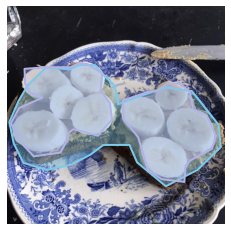

In [ ]:
img_no = 2

annIds = train_coco.getAnnIds(imgIds=train_annotations_data['images'][img_no]['id'])
anns = train_coco.loadAnns(annIds)

# load and render the image
plt.imshow(plt.imread(TRAIN_IMAGE_DIRECTIORY+train_annotations_data['images'][img_no]['file_name']))
plt.axis('off')
# Render annotations on top of the image
train_coco.showAnns(anns)

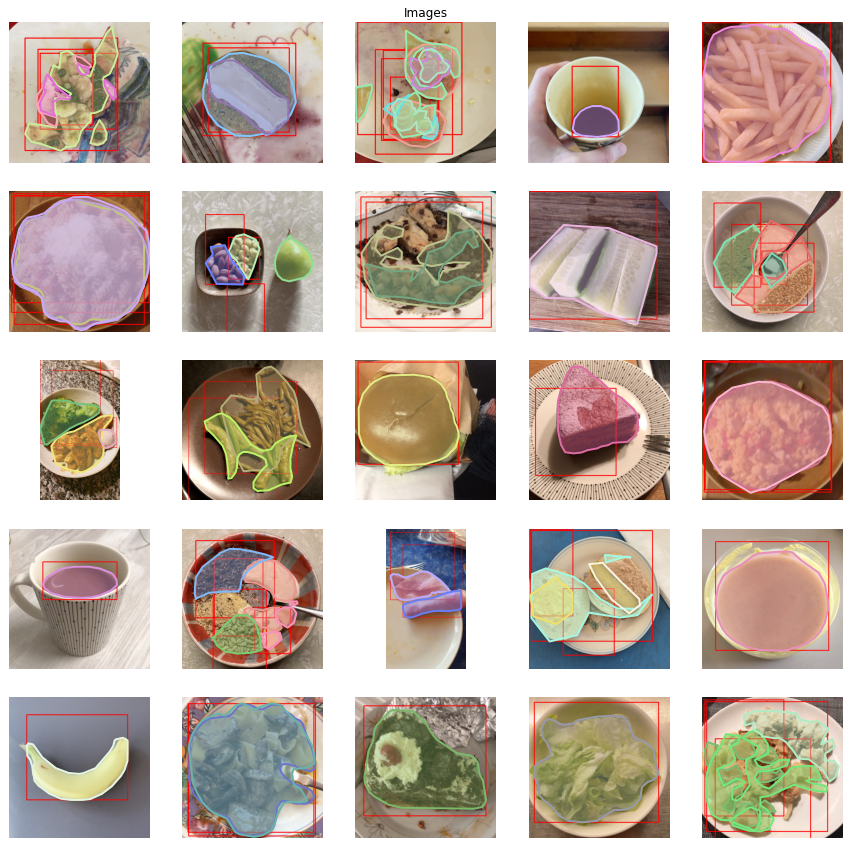

In [ ]:
w, h = 15, 15 # Setting width and height of every image
rows, cols = 5, 5 # Setting the number of image rows & cols

fig = plt.figure(figsize=(15, 15)) # Making the figure with size 

plt.title("Images") 
plt.axis('off')

# Going thought every cell in rows and cols
for i in range(1, cols * rows+1):
  annIds = train_coco.getAnnIds(imgIds=img_info['id'][i])
  anns = train_coco.loadAnns(annIds)

  fig.add_subplot(rows, cols, i)

  # Show the image

  img = plt.imread(TRAIN_IMAGE_DIRECTIORY+img_info['file_name'][i])
  for i in anns:
    [x,y,w,h] = i['bbox']
    #create rectagle bbox of size given in dataset
    cv2.rectangle(img, (int(x), int(y)), (int(x+h), int(y+w)), (255,0,0), 2)
  plt.imshow(img)

  # Render annotations on top of the image
  train_coco.showAnns(anns)

  # Setting the axis off
  plt.axis("off")

# Showing the figure
plt.show()

# Creating our Dataset 🔨

In this section we are goind to fix out dataset first ( because there is some issues with dataset ( size mismatch ) & creating our dataset to put into the model

## Fixing the Data

In [ ]:
#example print
np.array(train_annotations_data['annotations'][2]['segmentation']).shape , np.array(train_annotations_data['annotations'][2]['bbox']).shape

((1, 26), (4,))

In [ ]:
#mount the drive for logging and active submission
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Loading Dataset

Here comes the actual training part starting with first loading the datasets in coco format and registering them as instances

In [ ]:
!ls drive/MyDrive/Food_Recognition_2022/val/

ls: cannot access 'drive/MyDrive/Food_Recognition_2022/val/': No such file or directory


In [ ]:
train_annotations_path = 'drive/MyDrive/datas/train/new_ann.json'
train_images_path = 'drive/MyDrive/datas/train/images'

val_annotations_path = 'drive/MyDrive/datas/val/new_ann.json'
val_images_path = 'drive/MyDrive/datas/val/images'

In [ ]:
register_coco_instances("training_dataset", {},train_annotations_path, train_images_path)
# register_coco_instances("validation_dataset", {},val_annotations_path, VAL_IMAGE_DIRECTIORY)

In [ ]:
register_coco_instances("validation_dataset", {},val_annotations_path, val_images_path)

In [ ]:
from detectron2.data import transforms as T
# Define a sequence of augmentations:
augs = T.AugmentationList([
    T.RandomBrightness(0.9, 1.1),
    T.RandomFlip(prob=0.5),
    T.RandomCrop("absolute", (640, 640))
])  # type: T.Augmentation


# Creating our Detectron2 Model 🏭

We are going to make an Faster R-CNN Model with ResNeXt 101 backbone using Detectron2 libarary, and setting up hyperpamaters to train our model. [Here at model_zoo page](https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md) you can find available pretrained models to start your traning from. 

## Creating Mask R-CNN Model and Training on Our Dataset

we first load the configuration file for the model architecture, then load the pretrained model from model_zoo. Visit the model_zoo repo page for more details on configuration. 

In [ ]:

MODEL_ARCH = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"

cfg = get_cfg()
# Check the model zoo and use any of the models ( from detectron2 github repo)

cfg.merge_from_file(model_zoo.get_config_file(MODEL_ARCH))

cfg.DATASETS.TRAIN = ("training_dataset",)
cfg.DATASETS.TEST = ()

cfg.DATALOADER.NUM_WORKERS = 2

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(MODEL_ARCH)

## Setting up hyperparameters

Modify the model configuration hyperparameters for our training

In [ ]:
cfg.VERSION

3

In [ ]:
# No. of Batchs
cfg.SOLVER.IMS_PER_BATCH = 2     #for 16 GB GPU, reduce it to 2 for 12 GB GPU if you face CUDA memory error

# Learning Rate: 
cfg.SOLVER.BASE_LR = 0.0025

# No of Interations
cfg.SOLVER.MAX_ITER = 150000

# Options: WarmupMultiStepLR, WarmupCosineLR.
# See detectron2/solver/build.py for definition.
cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"

#save every 1000 steps
cfg.SOLVER.CHECKPOINT_PERIOD = 1000

# Images per batch (Batch Size) 
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256  

# No of Categories(Classes) present
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 323

cfg.OUTPUT_DIR = "/content/drive/MyDrive/logs_detectron2_r50fpn/logs"

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
#set if to true if you want to resume training
RESUME = True
trainer = DefaultTrainer(cfg) 

if RESUME:
  trainer.resume_or_load(resume=True)
else:
  trainer.resume_or_load(resume=False)

[11/24 12:14:03 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:42, 4.14MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


# Training the Model 🚂

Finally training our model!

### Start Training!!!

In [ ]:
trainer.train()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[11/24 22:30:12 d2.utils.events]:  eta: 11:14:15  iter: 50059  total_loss: 1.13  loss_cls: 0.4762  loss_box_reg: 0.3706  loss_mask: 0.2717  loss_rpn_cls: 0.00925  loss_rpn_loc: 0.01029  time: 0.7352  data_time: 0.0158  lr: 0.0025  max_mem: 2799M
[11/24 22:30:20 d2.utils.events]:  eta: 11:13:41  iter: 50079  total_loss: 1.143  loss_cls: 0.5202  loss_box_reg: 0.284  loss_mask: 0.3046  loss_rpn_cls: 0.007092  loss_rpn_loc: 0.00806  time: 0.7351  data_time: 0.0074  lr: 0.0025  max_mem: 2799M
[11/24 22:30:28 d2.utils.events]:  eta: 11:13:33  iter: 50099  total_loss: 0.8198  loss_cls: 0.4316  loss_box_reg: 0.1997  loss_mask: 0.2172  loss_rpn_cls: 0.007841  loss_rpn_loc: 0.006822  time: 0.7349  data_time: 0.0098  lr: 0.0025  max_mem: 2799M
[11/24 22:30:36 d2.utils.events]:  eta: 11:13:50  iter: 50119  total_loss: 0.8564  loss_cls: 0.3427  loss_box_reg: 0.2207  loss_mask: 0.2086  loss_rpn_cls: 0.003275  loss_rpn_loc: 0.007913  time: 0.7348  data_time: 0.0078

In [ ]:
# copy the trained model to content directory in colab
!cp '/content/drive/MyDrive/Food_Recognition_2022/logs/model_final.pth' /content/model_final.pth

In [ ]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")

evaluator = COCOEvaluator("validation_dataset", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "validation_dataset")
valResults = inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [11/25 09:51:12 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [11/25 09:51:14 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/25 09:51:14 d2.data.datasets.coco]: Loaded 946 images in COCO format from drive/MyDrive/datas/val/new_ann.json
[11/25 09:51:14 d2.data.build]: Distribution of instances among all 323 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
| beetroot-st.. | 5            | green_bean_.. | 1            | watermelon_.. | 5            |
| tuna_in_oil.. | 0            | sweet_potato  | 3            | country_fries | 3            |
| potato_gnoc.. | 1            | chips_frenc.. | 9            |   rosti_n_s   | 2            |
| vegetable_m.. | 

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 323

cfg.DATASETS.TEST = ("validation_dataset", )
predictor = DefaultPredictor(cfg)

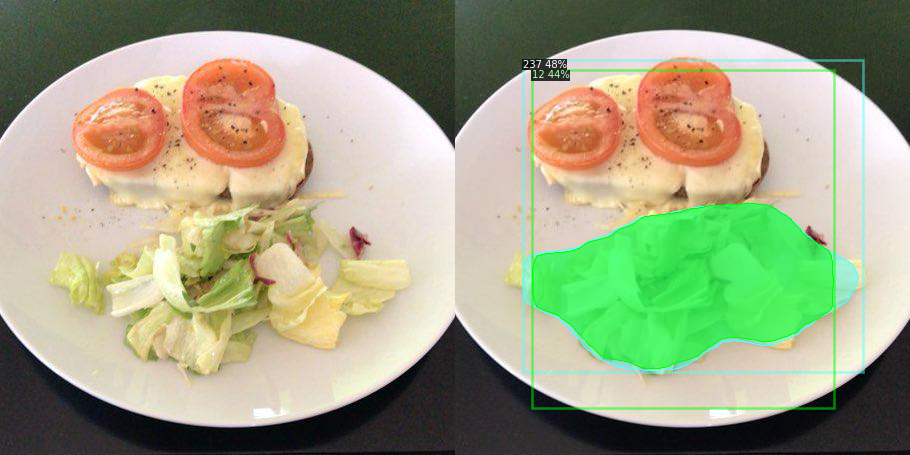

[[237, 'salad_leaf_salad_green'], [12, 'mixed_salad_chopped_without_sauce']]


In [ ]:
import cv2
import json
import glob
from PIL import Image
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog
# evaluator = COCOEvaluator("validation_dataset", cfg, False, output_dir=cfg.OUTPUT_DIR)
# val_loader = build_detection_test_loader(cfg, "validation_dataset")
# valResults = inference_on_dataset(trainer.model, val_loader, evaluator)

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 323

cfg.DATASETS.TEST = ("validation_dataset", )
predictor = DefaultPredictor(cfg)


val_metadata = MetadataCatalog.get("val_dataset")

#sample image
paths = glob.glob('drive/MyDrive/datas/val/images/*.jpg')
im = cv2.imread(paths[55])

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata, 
                   scale=1,
                   instance_mode=ColorMode.IMAGE
    )

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
display(Image.fromarray(cv2.hconcat([im[:,:,::-1], out.get_image()])))

with open("drive/MyDrive/class_to_category.json", 'r') as fp:
    class_to_category = json.load(fp)
with open('drive/MyDrive/datas/val/new_ann.json', 'r') as f:
    train_annotations_data = json.load(f)

detected_classes = outputs['instances'].get('pred_classes').cpu().numpy()
name_list = []
for cls_id in detected_classes:
    for category in train_annotations_data['categories']:
        if category['id'] == class_to_category[str(cls_id)]:
            name_list.append([cls_id, category['name']])
print(name_list)